In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
#from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU,LSTM
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv('/content/drive/MyDrive/FakeNewsNet.csv')
df.head()


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [4]:

df.isnull().sum()


,0
title,0
news_url,330
source_domain,330
tweet_num,0
real,0


In [5]:

df.shape


(23196, 5)

In [6]:

df['news_url'][0]


'http://toofab.com/2017/05/08/real-housewives-atlanta-kandi-burruss-rape-phaedra-parks-porsha-williams/'

In [7]:

df['real'].unique()


array([1, 0])

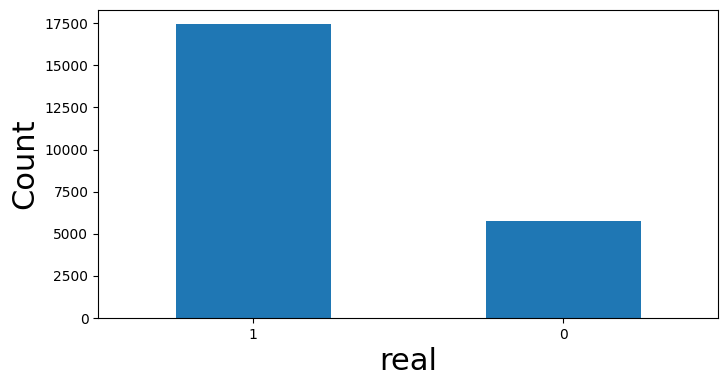

In [8]:

plt.figure(figsize=(8,4))
df['real'].value_counts().plot(kind='bar')
plt.xlabel('real',size=22)
plt.xticks(rotation='horizontal')
plt.ylabel('Count',size=22)
plt.show()


In [9]:

# now i deciding to drop the news_url,source_domain in the datasets
df.drop(['news_url','source_domain'],axis=1,inplace=True)



In [10]:

df.head()


,title,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,42,1
1,People's Choice Awards 2018: The best red carp...,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,63,1
3,Colombian singer Maluma sparks rumours of inap...,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,38,1


In [11]:

df['title'].unique()


array(["Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)",
       "People's Choice Awards 2018: The best red carpet looks",
       "Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'",
       ...,
       'Zayn Malik & Gigi Hadid’s Shocking Split: Why There’s A Chance They’ll Reunite ‘Down The Line’',
       "Jessica Chastain Recalls the Moment Her Mother's Boyfriend Slapped Her: 'I Just Kicked Him in the Genitals'",
       "Kelly Clarkson Performs a Medley of Kendrick Lamar's 'Humble' & More Hits at the Billboard Music Awards"],
      dtype=object)

# now preprocessing the data


In [12]:
import re
def function(text):
  return  re.sub('[^a-zA-Z]',' ',text)
df['title'].apply(function).unique()

array(['Kandi Burruss Explodes Over Rape Accusation on  Real Housewives of Atlanta  Reunion  Video ',
       'People s Choice Awards       The best red carpet looks',
       'Sophia Bush Sends Sweet Birthday Message to  One Tree Hill  Co Star Hilarie Burton   Breyton  eva ',
       ...,
       'Zayn Malik   Gigi Hadid s Shocking Split  Why There s A Chance They ll Reunite  Down The Line ',
       'Jessica Chastain Recalls the Moment Her Mother s Boyfriend Slapped Her   I Just Kicked Him in the Genitals ',
       'Kelly Clarkson Performs a Medley of Kendrick Lamar s  Humble    More Hits at the Billboard Music Awards'],
      dtype=object)

In [13]:
def function(text):
  return  re.sub('\s+[^a-zA-Z]\s+',' ',text)
df['title'].apply(function).unique()

array(["Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)",
       "People's Choice Awards 2018: The best red carpet looks",
       "Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'",
       ...,
       'Zayn Malik Gigi Hadid’s Shocking Split: Why There’s A Chance They’ll Reunite ‘Down The Line’',
       "Jessica Chastain Recalls the Moment Her Mother's Boyfriend Slapped Her: 'I Just Kicked Him in the Genitals'",
       "Kelly Clarkson Performs a Medley of Kendrick Lamar's 'Humble' More Hits at the Billboard Music Awards"],
      dtype=object)

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:

def preprocessing(text):

    # convert in lower
    text = text.lower()

    # convert in a-z|A-Z
    text = re.sub(r'[^a-zA-Z]',' ',text)
    # removing the appostropy
    text = re.sub(r'[^a-zA-Z]\s+',' ',text)
    # removing the extra space
    text = re.sub(r'\s+[^a-zA-Z]\s+',' ',text)
    # removing the stop words
    pattern = re.compile(r'\b(' +r'|'.join(stopwords.words('english')) +r')\b\s*')
    text = re.sub(pattern,'',text)

    return text


df['title'] = df['title'].apply(preprocessing)
df['title']


,title
0,kandi burruss explodes rape accusation real ho...
1,people choice awards best red carpet looks
2,sophia bush sends sweet birthday message one t...
3,colombian singer maluma sparks rumours inappro...
4,gossip girl years later upper east siders shoc...
...,...
23191,pippa middleton wedding case missed pippa marr...
23192,zayn malik gigi hadid shocking split chance re...
23193,jessica chastain recalls moment mother boyfrie...
23194,tristan thompson feels dumped khlo kardashian ...


In [16]:

df['title'].unique()



array(['kandi burruss explodes rape accusation real housewives atlanta reunion video ',
       'people choice awards best red carpet looks',
       'sophia bush sends sweet birthday message one tree hill co star hilarie burton breyton eva ',
       ..., 'zayn malik gigi hadid shocking split chance reunite line ',
       'jessica chastain recalls moment mother boyfriend slapped kicked genitals ',
       'kelly clarkson performs medley kendrick lamar humble hits billboard music awards'],
      dtype=object)

In [17]:

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def porter(text):

    return ' '.join([ps.stem(word) for word in text.split()])

df['title'] = df['title'].apply(porter)
df['title']


,title
0,kandi burruss explod rape accus real housew at...
1,peopl choic award best red carpet look
2,sophia bush send sweet birthday messag one tre...
3,colombian singer maluma spark rumour inappropr...
4,gossip girl year later upper east sider shock ...
...,...
23191,pippa middleton wed case miss pippa marri lace...
23192,zayn malik gigi hadid shock split chanc reunit...
23193,jessica chastain recal moment mother boyfriend...
23194,tristan thompson feel dump khlo kardashian ref...


In [18]:

df.head()


,title,tweet_num,real
0,kandi burruss explod rape accus real housew at...,42,1
1,peopl choic award best red carpet look,0,1
2,sophia bush send sweet birthday messag one tre...,63,1
3,colombian singer maluma spark rumour inappropr...,20,1
4,gossip girl year later upper east sider shock ...,38,1


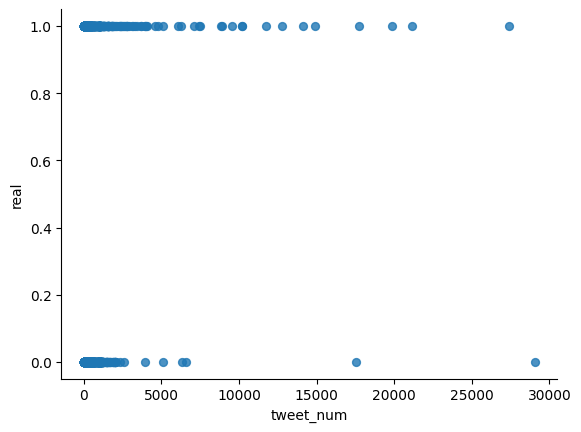

In [19]:
# tweet_num vs real

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='tweet_num', y='real', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


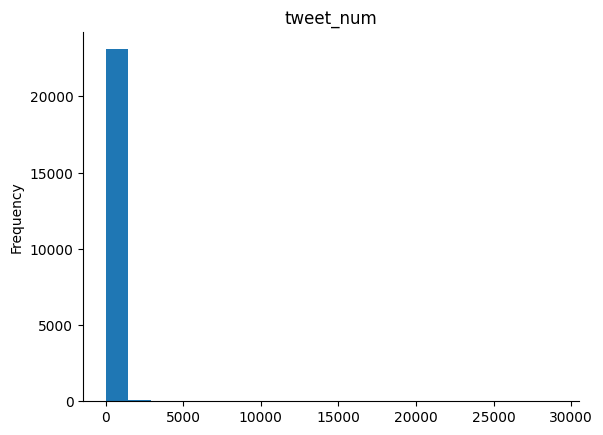

In [20]:
# tweet_num

from matplotlib import pyplot as plt
df['tweet_num'].plot(kind='hist', bins=20, title='tweet_num')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [21]:

# now droping the tweet_num column
df.drop(['tweet_num'],axis=1,inplace=True)


In [22]:
# copy the dataframe
df2 = df.copy()
df2.head()

,title,real
0,kandi burruss explod rape accus real housew at...,1
1,peopl choic award best red carpet look,1
2,sophia bush send sweet birthday messag one tre...,1
3,colombian singer maluma spark rumour inappropr...,1
4,gossip girl year later upper east sider shock ...,1


# Now start building a Model

In [23]:

from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(df2,test_size=0.2,random_state=12)

train_data


,title,real
6338,chrissi teigen open first time postpartum depress,0
15979,fifti shade dakota thing peopl know dakota joh...,0
20773,isi hack meghan markl intim photo arm twist ro...,0
16815,royal mess princess eugeni want ban kate middl...,0
5802,find realli sad reason kyli jenner never went ...,1
...,...,...
3714,peta murgatroyd maksim chmerkovskiy heather mo...,1
7409,realli happen backstag ny fashion week,1
19709,jare padalecki birthday keg stand supernatur c...,1
5787,melania trump kate middleton style twin real q...,1


In [24]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Dropout,BatchNormalization


In [25]:
# tokenizer
token_word = Tokenizer(num_words=6000)

token_word.fit_on_texts(train_data['title'])
# for train
x_train = token_word.texts_to_sequences(train_data['title'])
# for test
x_test = token_word.texts_to_sequences(test_data['title'])

x_train


[[274, 351, 117, 19, 37, 2797, 1201],
 [1128, 472, 918, 104, 146, 92, 918, 426],
 [3288, 1129, 20, 22, 1649, 23, 1082, 851, 44, 3623],
 [44, 2247, 248, 1563, 63, 799, 41, 87, 1564, 9],
 [359, 175, 2024, 275, 39, 5, 269, 706, 2025, 24, 1130, 392, 82],
 [3289, 303, 3, 52, 153, 2404, 2404, 443, 185],
 [29, 33, 5578, 2564],
 [78, 339, 417, 597, 572, 105, 234, 43, 2116, 17, 42],
 [101, 216, 11, 32, 48, 51, 783, 661, 143],
 [436, 3290, 724, 2, 5579, 1130, 2565, 28, 265],
 [616, 800, 7, 887, 1082, 3017, 978],
 [4, 126, 393, 1565, 3291, 266, 15, 122, 235, 276],
 [221, 176, 4, 603, 223],
 [20, 22, 194, 628, 12],
 [1446, 226, 616, 800, 85, 509, 1083, 1341, 3, 488, 670],
 [801, 2566, 28, 802, 118, 1167, 384, 444, 2248],
 [182, 333, 662, 707, 455, 888, 129, 360, 520, 55],
 [871, 2, 629, 106, 189, 19, 144, 86],
 [88, 427, 10, 47, 340],
 [120, 889, 45, 4704, 10, 708, 1650, 3624],
 [1252, 4071, 1813, 64],
 [1914, 172, 277, 3018],
 [1394, 827, 979, 189, 1342, 248],
 [205, 156, 334, 309, 4072, 2117, 21

In [43]:
with open('token_word.pkl','wb') as file:
  pickle.dump(token_word,file)


In [26]:

x_train_pad = pad_sequences(x_train,maxlen=150)
x_test_pad = pad_sequences(x_test,maxlen=150)

x_train_pad




array([[   0,    0,    0, ...,   37, 2797, 1201],
       [   0,    0,    0, ...,   92,  918,  426],
       [   0,    0,    0, ...,  851,   44, 3623],
       ...,
       [   0,    0,    0, ...,    2,  161,   24],
       [   0,    0,    0, ...,   84,  280,  174],
       [   0,    0,    0, ...,  241,  175,  132]], dtype=int32)

In [27]:

# now extracting the y_train and y_test in train_data and test_data

y_train = train_data['real']
y_test = test_data['real']


y_train = np.asarray(y_train).astype('float32')  # Ensure y_train is a NumPy array with float32 dtype
y_test = np.asarray(y_test).astype('float32')  # Ensure y_test is a NumPy array with float32 dtype



In [28]:

model = Sequential()
# 1st Hidden layer
model.add(Embedding(6000,100,input_length=150))
model.add(LSTM(64,return_sequences=True,kernel_initializer='glorot_normal',dropout=0.25))
model.add(Dropout(0.25))
# 2nd Hidden layer
model.add(LSTM(128,return_sequences=True,kernel_initializer='glorot_normal',dropout=0.25))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# 3rd Hidden layer
model.add(LSTM(262,return_sequences=True,kernel_initializer='glorot_normal',dropout=0.25))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# 4 Hidden layer
model.add(LSTM(380,return_sequences=True,dropout=0.25,kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
# 5 Hidden layer
model.add(LSTM(520))
# output layer
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:


history = model.fit(x_train_pad,y_train,validation_data=(x_test_pad,y_test),epochs=5)


Epoch 1/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 62s 85ms/step - accuracy: 0.7381 - loss: 0.5681 - val_accuracy: 0.8269 - val_loss: 0.4517
Epoch 2/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 45s 77ms/step - accuracy: 0.8517 - loss: 0.3634 - val_accuracy: 0.8332 - val_loss: 0.4210
Epoch 3/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.8784 - loss: 0.3042 - val_accuracy: 0.8414 - val_loss: 0.3771
Epoch 4/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8919 - loss: 0.2737 - val_accuracy: 0.8407 - val_loss: 0.3925
Epoch 5/5
580/580 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9033 - loss: 0.2447 - val_accuracy: 0.8334 - val_loss: 0.4145


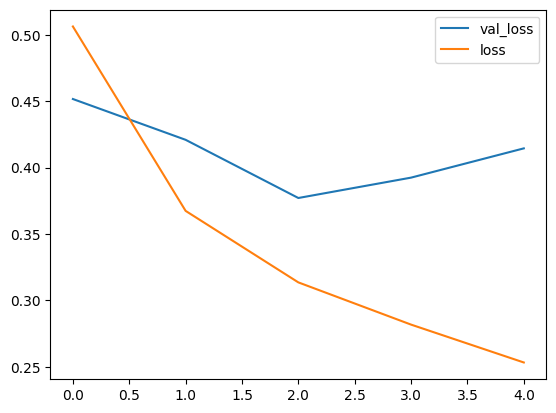

In [30]:

plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='loss')
plt.legend()
plt.show()


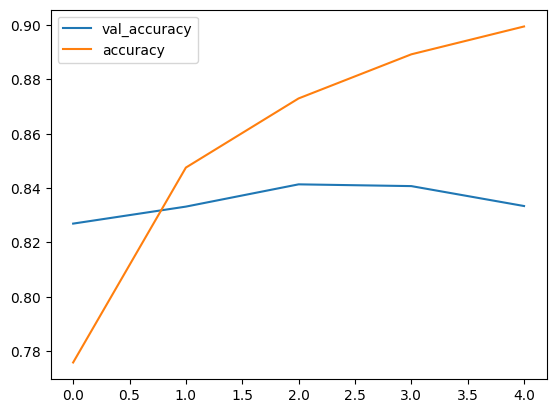

In [31]:

plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()


# Checking the Model

In [32]:

model.predict(x_test_pad)


145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


array([[0.2677066 ],
       [0.22767097],
       [0.98570305],
       ...,
       [0.58308524],
       [0.9791798 ],
       [0.9865891 ]], dtype=float32)

In [33]:

df2.head()


,title,real
0,kandi burruss explod rape accus real housew at...,1
1,peopl choic award best red carpet look,1
2,sophia bush send sweet birthday messag one tre...,1
3,colombian singer maluma spark rumour inappropr...,1
4,gossip girl year later upper east sider shock ...,1


In [34]:

df2['title'][3]


'colombian singer maluma spark rumour inappropri relationship aunt'

In [35]:

input_text = 'colombian singer maluma spark rumour inappropri relationship aunt'
# tokenizes
input_text_token = token_word.texts_to_sequences([input_text])
# using pad_sequence
input_sequence = pad_sequences(input_text_token,maxlen=150)
# now predict
y_pred = model.predict(input_sequence)

if y_pred>0.5:
  print('Real News')

else:
  print('Fake News')



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Real News


In [36]:
df.iloc[50]

,50
title,mama june trash talk daughter pumpkin fianc
real,1


In [37]:

input_text = 'mama june trash talk daughter pumpkin fianc'
# tokenizes
input_text_token = token_word.texts_to_sequences([input_text])
# using pad_sequence
input_sequence = pad_sequences(input_text_token,maxlen=150)
# now predict
y_pred = model.predict(input_sequence)

if y_pred>0.5:
  print('Real News')

else:
  print('Fake News')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Real News


In [38]:

df.iloc[5000]


,5000
title,honestli chic shop outfit jessica alba califor...
real,1


In [39]:

input_text = 'honestli chic shop outfit jessica alba california casual pregnanc style'
# tokenizes
input_text_token = token_word.texts_to_sequences([input_text])
# using pad_sequence
input_sequence = pad_sequences(input_text_token,maxlen=150)
# now predict
y_pred = model.predict(input_sequence)

if y_pred>0.5:
  print('Real News')

else:
  print('Fake News')




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Real News


In [40]:

df[df['real']==0].iloc[5]


,18
title,kardashian donat whop sum la vega mass shoot v...
real,0


In [41]:

input_text = 'kardashian donat whop sum la vega mass shoot victim'
# tokenizes
input_text_token = token_word.texts_to_sequences([input_text])
# using pad_sequence
input_sequence = pad_sequences(input_text_token,maxlen=150)
# now predict
y_pred = model.predict(input_sequence)

if y_pred>0.5:
  print('Real News')

else:
  print('Fake News')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fake News


In [42]:
model.save('lstm_model.h5')